In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

# 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## A. Choose features other than the ones used in the lesson.

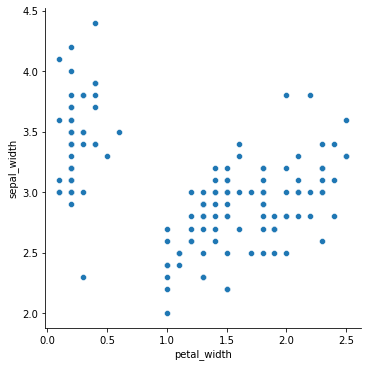

In [4]:
sns.relplot(data = iris, x = 'petal_width', y = 'sepal_width')

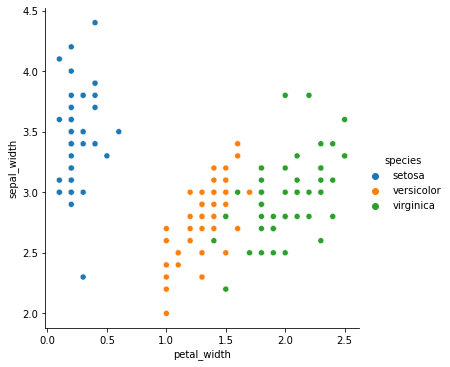

In [5]:
sns.relplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species')

In [6]:
X = iris[['petal_width', 'sepal_width']]

## take the fields you want to use for your modeling

In [7]:
kmeans = KMeans(n_clusters=3)

## make the model, n_clusters being how many clusters you want in your model 

In [8]:
kmeans.fit(X)

## fit the model to the fields you want to use in your model

KMeans(n_clusters=3)

In [9]:
kmeans.predict(X)

## make your predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
iris['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


## B. Visualize the results of your clustering.

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids



,petal_width,sepal_width
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


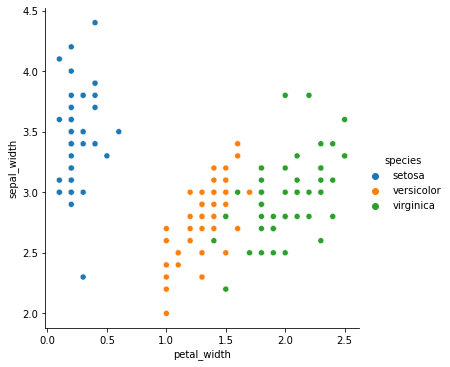

In [13]:
sns.relplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species')

<Figure size 1008x648 with 0 Axes>

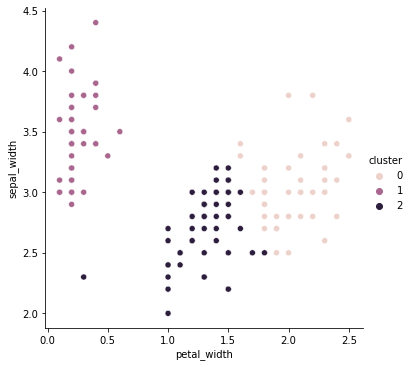

In [14]:
plt.figure(figsize=(14, 9))

sns.relplot(data=iris, x='petal_width', y='sepal_width', hue='cluster')

## C. Use the elbow method to visually select a good value for k.

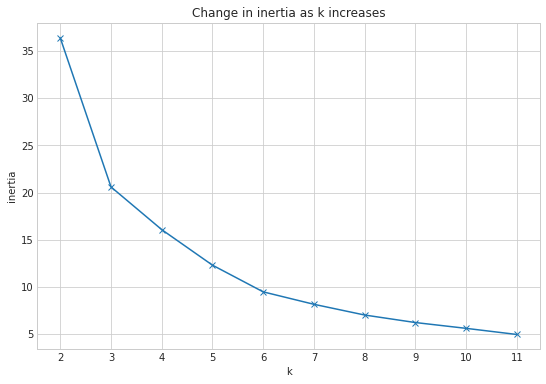

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## D. Repeat the clustering, this time with 3 different features.

In [16]:
X = iris[['petal_length', 'sepal_length', 'petal_width']]

## take the fields you want to use for your modeling

In [17]:
kmeans = KMeans(n_clusters=3)

## make the model, n_clusters being how many clusters you want in your model 

In [18]:
kmeans.fit(X)

## fit the model to the fields you want to use in your model

KMeans(n_clusters=3)

In [19]:
kmeans.predict(X)

## make your predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [20]:
iris['cluster3'] = kmeans.predict(X)

## store the predictions as a column on your df

In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster3
1,5.1,3.5,1.4,0.2,setosa,1,1
2,4.9,3.0,1.4,0.2,setosa,1,1
3,4.7,3.2,1.3,0.2,setosa,1,1
4,4.6,3.1,1.5,0.2,setosa,1,1
5,5.0,3.6,1.4,0.2,setosa,1,1


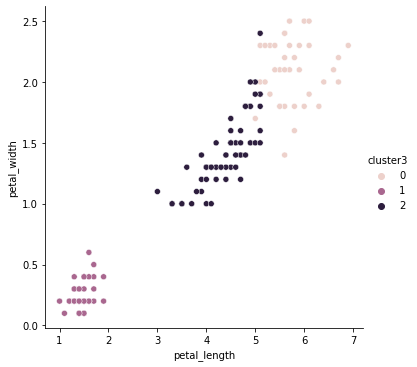

In [22]:
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster3')

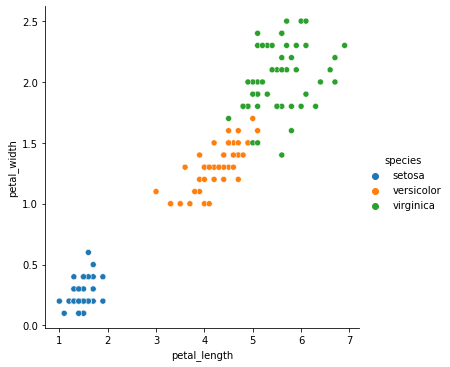

In [23]:
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species')

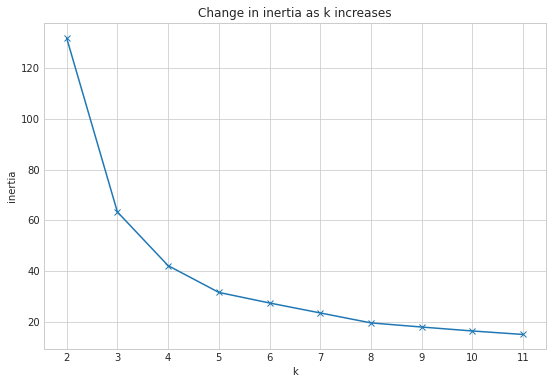

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [25]:
import wrangle_mall

In [26]:
mall = wrangle_mall.acquire_mall()

In [27]:
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
mall.shape

(200, 5)

In [29]:
mall.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [30]:
mall = wrangle_mall.encode(mall)

In [31]:
mall.head()

,customer_id,age,annual_income,spending_score,male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [32]:
mall = mall.set_index("customer_id")

In [33]:
mall.head()

,age,annual_income,spending_score,male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [34]:
X = mall[['annual_income', 'spending_score']]

## take the fields you want to use for your modeling

In [35]:
kmeans = KMeans(n_clusters=3)

## make the model, n_clusters being how many clusters you want in your model 

In [36]:
kmeans.fit(X)

## fit the model to the fields you want to use in your model

KMeans(n_clusters=3)

In [37]:
kmeans.predict(X)

## make your predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [38]:
mall['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [39]:
mall.head()

,age,annual_income,spending_score,male,cluster
customer_id,,,,,
1,19,15,39,1,1
2,21,15,81,1,1
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1


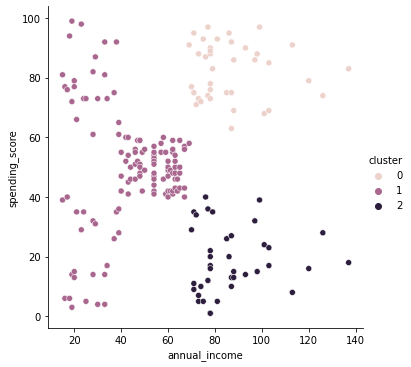

In [40]:
sns.relplot(data=mall, x='annual_income', y='spending_score', hue='cluster')

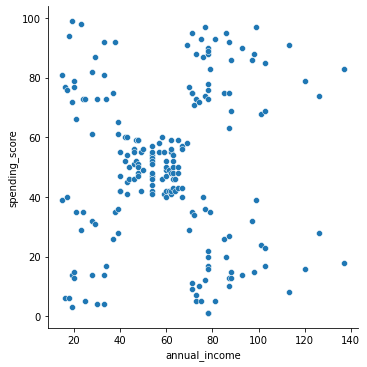

In [41]:
sns.relplot(data=mall, x='annual_income', y='spending_score')

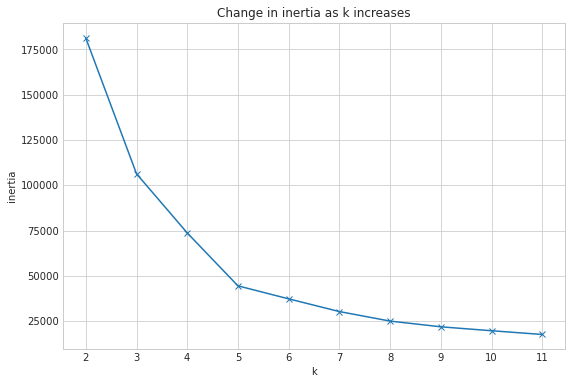

In [42]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [43]:
## elbow occurs at 5, we should try k = 5

In [44]:
kmeans = KMeans(n_clusters=5)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

mall['cluster5'] = kmeans.predict(X)

## store the predictions as a column on your df

In [45]:
mall.head()

,age,annual_income,spending_score,male,cluster,cluster5
customer_id,,,,,,
1,19,15,39,1,1,4
2,21,15,81,1,1,2
3,20,16,6,0,1,4
4,23,16,77,0,1,2
5,31,17,40,0,1,4


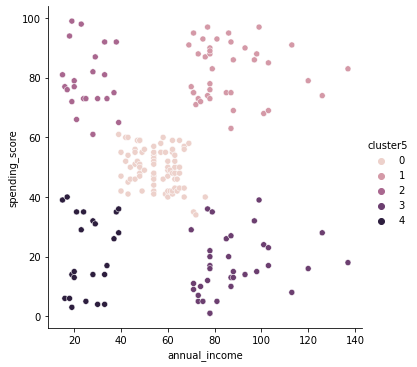

In [46]:
sns.relplot(data=mall, x='annual_income', y='spending_score', hue='cluster5')

# 3. How does scaling impact the results of clustering?

## Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

#### Iris Data

In [47]:
from wrangle_mall import scale_data

import sklearn

In [48]:
iris_scaled = iris.drop(columns = ['species', 'cluster', 'cluster3'])

In [49]:
iris_scaled = scale_data(iris_scaled)

In [50]:
iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [51]:
X = iris_scaled[['petal_width', 'sepal_width']]

## take the fields you want to use for your modeling

In [52]:
kmeans = KMeans(n_clusters=3)

## make the model, n_clusters being how many clusters you want in your model 

In [53]:
kmeans.fit(X)

## fit the model to the fields you want to use in your model

KMeans(n_clusters=3)

In [54]:
kmeans.predict(X)

## make your predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
iris_scaled['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [56]:
iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,0.222222,0.625000,0.067797,0.041667,2
1,0.166667,0.416667,0.067797,0.041667,2
2,0.111111,0.500000,0.050847,0.041667,2
3,0.083333,0.458333,0.084746,0.041667,2
4,0.194444,0.666667,0.067797,0.041667,2


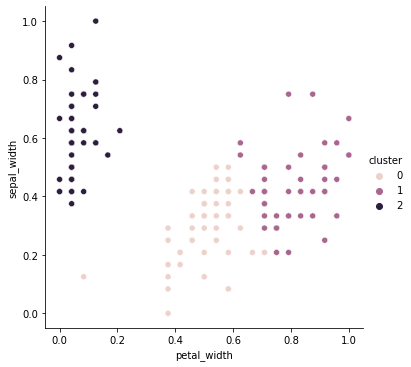

In [57]:
sns.relplot(data=iris_scaled, x='petal_width', y='sepal_width', hue='cluster')

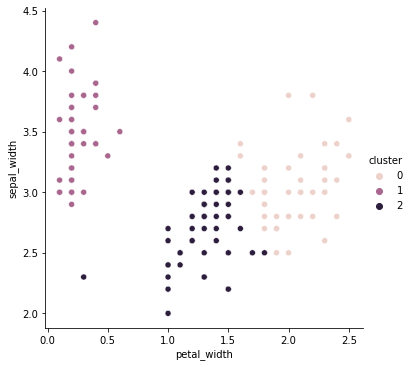

In [58]:
sns.relplot(data=iris, x='petal_width', y='sepal_width', hue='cluster')

#### Mall Data

In [59]:
mall.head()

,age,annual_income,spending_score,male,cluster,cluster5
customer_id,,,,,,
1,19,15,39,1,1,4
2,21,15,81,1,1,2
3,20,16,6,0,1,4
4,23,16,77,0,1,2
5,31,17,40,0,1,4


In [60]:
mall_scaled = mall.drop(columns = ['cluster', 'cluster5'])

In [61]:
mall_scaled = scale_data(mall_scaled)

In [62]:
mall_scaled.head()

,age,annual_income,spending_score,male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [63]:
X = mall_scaled[['annual_income', 'spending_score']]

## take the fields you want to use for your modeling

kmeans = KMeans(n_clusters=5)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)

## make your predictions

mall_scaled['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [64]:
mall_scaled.head()

,age,annual_income,spending_score,male,cluster
0,0.019231,0.000000,0.387755,1.0,0
1,0.057692,0.000000,0.816327,1.0,4
2,0.038462,0.008197,0.051020,0.0,0
3,0.096154,0.008197,0.775510,0.0,4
4,0.250000,0.016393,0.397959,0.0,0


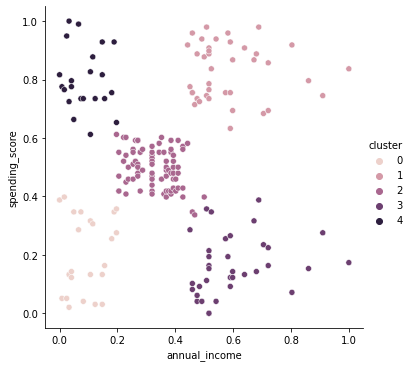

In [65]:
sns.relplot(data=mall_scaled, x='annual_income', y='spending_score', hue='cluster')

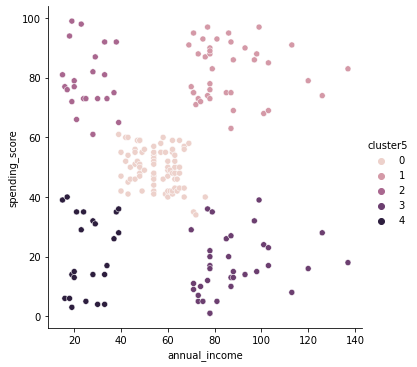

In [66]:
sns.relplot(data=mall, x='annual_income', y='spending_score', hue='cluster5')

In [67]:
## Overall scaling did not appear to have an impact on the clustering models